In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Intro

Logistic regression predicts the probability of events to happen. It outputs a prediction between 0 and 1.

We use the sigmoid function to map the output of a linear function to something between 0 and 1.

Sigmoid function

$$
\sigma(x) = \frac{1}{1 + e^{-z}}
$$

Z = w.Tx + b

1. w - vector of weights
2. b - bias term
3. x - feature vector

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Sigmoid takes any value and maps it to something between 0 and 1.

To measure our model, we use Binary cross entropy loss (a.k.a log loss).

$$
L(\hat{y}, y) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$


1. m - number of samples
2. y_i = true label for sample i
3. y_hat = predicted probability for sample i

e = 2.718

The result of the loss is determined by log of the prediction. If the true label is 1, the part of the function that has a say is the left side of the plus. If the true label is 0, its the right side.

In any situation, the result of the loss is the log of the prediction. The closer to 0 the prediction is, the bigger log of the prediction is. 

If the true label is 1, the right side (after the plus) is 0. The loss will be determined by the left side.
The closer the prediction 1, the smaller the log will be, hence the smaller the loss will be.

In [51]:
math.log(0.999)

-0.0010005003335835344

In [52]:
math.log(0.001)

-6.907755278982137

Log loss (a.k.a binary cross entropy loss) penalizes both on accuracy and confidence. If y = 1 and log(y_hat) is close to 0, it will be far worse then if its close to 1.

## Plot

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

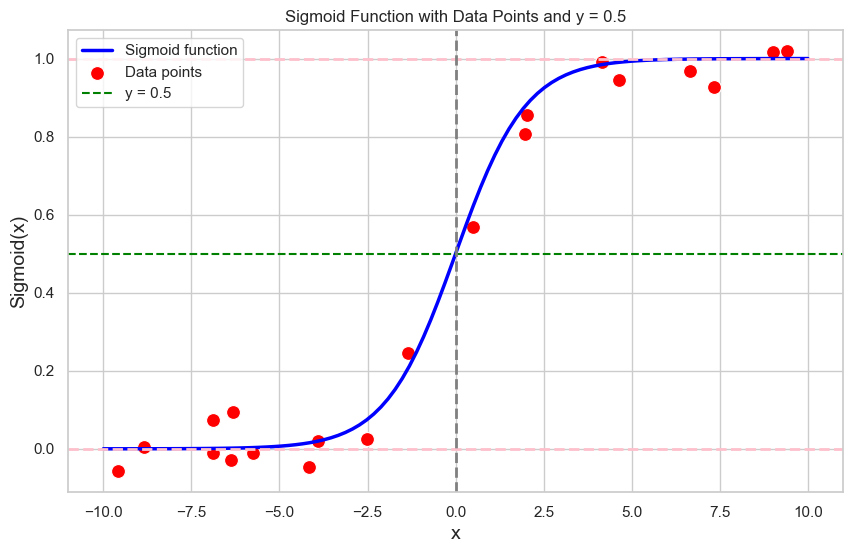

In [5]:
sns.set(style="whitegrid")

x = np.linspace(-10, 10, 100)

y = sigmoid(x)

np.random.seed(42)
x_data = np.random.uniform(-10, 10, 20)
y_data = sigmoid(x_data) + np.random.normal(0, 0.05, x_data.shape)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='blue', linewidth=2.5, label='Sigmoid function')
sns.scatterplot(x=x_data, y=y_data, color='red', s=100, label='Data points')

plt.axhline(0.5, color='green', linestyle='--', linewidth=1.5, label='y = 0.5')

plt.axhline(0, color='pink', linestyle='--', linewidth=2)
plt.axhline(1, color='pink', linestyle='--', linewidth=2)
plt.axvline(0, color='gray', linestyle='--', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Sigmoid(x)', fontsize=14)
plt.title('Sigmoid Function with Data Points and y = 0.5', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

## Data

In [19]:
heart_disease_df = pd.read_csv('../../datasets/heart-disease.csv')
X = heart_disease_df.drop(['target'], axis=1)
y = heart_disease_df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn Implementation

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)

0.881578947368421

## Math

Basic prediction formula

In [54]:
X = np.array([1.7,2,3])
weights = np.zeros(3)
weights_with_samples = X @ weights
weights_with_samples

0.0

In [55]:
X.shape, weights.shape

((3,), (3,))

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
sigmoid(weights_with_samples)

0.5

In [64]:
def compute_mean_loss(y, y_pred):
    
    log_loss_per_sample = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    log_loss = np.mean(log_loss_per_sample)
    
    return log_loss

In [65]:

y = np.array([1, 0, 1])

y_good_pred = np.array([0.9, 0.2, 0.7])
y_medium_pred = np.array([0.5, 0.5, 0.5])
y_lousy_pred = np.array([0.1, 0.9, 0.2])

low_loss = compute_mean_loss(y, y_good_pred)
medium_loss = compute_mean_loss(y, y_medium_pred)
high_loss = compute_mean_loss(y, y_lousy_pred)


print('good preds', low_loss)
print('medium preds', medium_loss)
print('lousy preds', high_loss)

good preds 0.22839300363692283
medium preds 0.6931471805599453
lousy preds 2.0715360328073973


## Implementation From Scratch

In [35]:
class LogisticRegressionSelfMade:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            gradient_w = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            gradient_b = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [36]:
model = LogisticRegressionSelfMade(learning_rate=0.05, n_iterations=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


0.4605263157894737